In [23]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import warnings

In [24]:
warnings.filterwarnings('ignore')

In [25]:
# import data from sklearn
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [26]:
# make a dataframe from the data
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# make the columns as features and investigate at the same time whether they have multicollinearity or not (high correlation)
columns = df.columns.to_list()[:10]
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

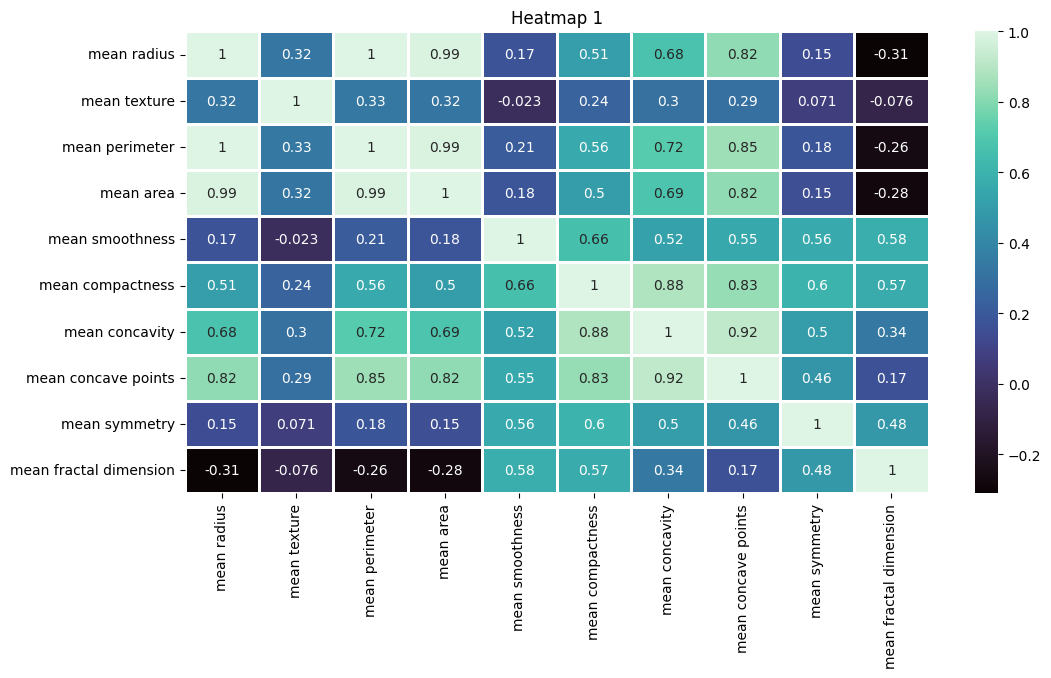

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=[12, 6])
sns.heatmap(df[columns].corr(), annot=True, cmap = 'mako', linewidths=2, linecolor='white')
plt.title('Heatmap 1')
plt.show()
plt.clf()

In [29]:
features = list(columns[:2]+columns[4:5]+columns[8:])

In [30]:
# make X and y as predictor(df for the first run) and outcome(one D array) variables to the model
X = df[features]
y = data.target

In [31]:
# The outcome variable must be binary
f'The outcome variable is {np.unique(data.target)} meaning the tumor could be {np.unique(data.target_names)}'

"The outcome variable is [0 1] meaning the tumor could be ['benign' 'malignant']"

In [32]:
min_class_size = min(np.sum(data.target == 0), np.sum(data.target == 1))

In [33]:
# At a maximum, there should be no more than the smallest class size divided by 10 number of features.
max_features = min_class_size / 10
f'''The maximum of the features is {max_features} and the number of predictor variables is {X.columns.nunique()
}, so the assumption that the sample must be big enough is {max_features > X.columns.nunique()}'''

'The maximum of the features is 21.2 and the number of predictor variables is 5, so the assumption that the sample must be big enough is True'

In [34]:
# make a heatmap in order to decide what features must be dropped to avoid multicollinearity
plt.figure(figsize=[7, 5])
sns.heatmap(X.corr(), annot=True, cmap="mako", linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.show()
plt.clf()

In [ ]:
# make a pairplot just for fun
sns.pairplot(X, kind='kde')
plt.show()
plt.clf()

In [ ]:
X

In [ ]:
# standardize the X values by initalizing the StandardScaler then fit and transform the dataframe (X) back into a 2D array
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X

In [ ]:
type(X), type(y), X.shape, y.shape

In [ ]:
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [ ]:
# make a LogisticRegression model, fit the training X and y values and then predict y values with using test x values
lrm = LogisticRegression(penalty=None, fit_intercept=True)
model = lrm.fit(X_train, y_train)
threshold = 0.25
y_pred = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
y_test, y_pred

In [ ]:
# Evaluate the model by using from sklearn.metrics import confusion_matrix and accuracy_score
print(f'The prediction threshold is: {threshold}')
print(f'''The confusion matrix is below:\n\n{confusion_matrix(y_test, y_pred)}
\nThis represents the true positives, false positives in the first row, then false negatives and true negatives in the second row.\n''')
print(f'The model is {round(100*accuracy_score(y_test, y_pred))}% accurate')
print(f'The model is {round(100*precision_score(y_test, y_pred))}% precise')
print(f'The model recall ratio is {round(100*recall_score(y_test, y_pred))}%')

In [ ]:
threshold = 0.50
y_pred = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
# Evaluate the model by using from sklearn.metrics import confusion_matrix and accuracy_score
print(f'The prediction threshold is: {threshold}')
print(f'''The confusion matrix is below:\n\n{confusion_matrix(y_test, y_pred)}
\nThis represents the true positives, false positives in the first row, then false negatives and true negatives in the second row.\n''')
print(f'The model is {round(100*accuracy_score(y_test, y_pred))}% accurate')
print(f'The model is {round(100*precision_score(y_test, y_pred))}% precise')
print(f'The model recall ratio is {round(100*recall_score(y_test, y_pred))}%')

In [ ]:
threshold = 0.75
y_pred = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
# Evaluate the model by using from sklearn.metrics import confusion_matrix and accuracy_score
print(f'The prediction threshold is: {threshold}')
print(f'''The confusion matrix is below:\n\n{confusion_matrix(y_test, y_pred)}
\nThis represents the true positives, false positives in the first row, then false negatives and true negatives in the second row.\n''')
print(f'The model is {round(100*accuracy_score(y_test, y_pred))}% accurate')
print(f'The model is {round(100*precision_score(y_test, y_pred))}% precise')
print(f'The model recall ratio is {round(100*recall_score(y_test, y_pred))}%')

### Conclusion: 
`We can see that using lower prediction threshold means that we decrease not just the true positive count but also the number of false negatives.
It means that we made the model more sensitive in order to save lives and catch as much malignant cancer as possible. 
The precision of the model is secondary but it has not changed significantly.`